In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("Pokemon.csv")
df.shape

(800, 13)

In [5]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [112]:
df = df.rename(columns={'#':'PI_num',
                        'Type 1':'Type_1',
                        'Type 2':'Type_2',
                        'Sp. Atk':'Sp_Atk',
                        'Sp. Def':'Sp_Def'})
df

,PI_num,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PI_num      800 non-null    int64 
 1   Name        800 non-null    object
 2   Type_1      800 non-null    object
 3   Type_2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp_Atk      800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
#Finding null values for each given attribute
df.isnull().sum()

PI_num          0
Name            0
Type_1          0
Type_2        386
Total           0
HP              0
Attack          0
Defense         0
Sp_Atk          0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
#Checking for duplicated rows
df.loc[df.duplicated()]

,PI_num,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp. Def,Speed,Generation,Legendary


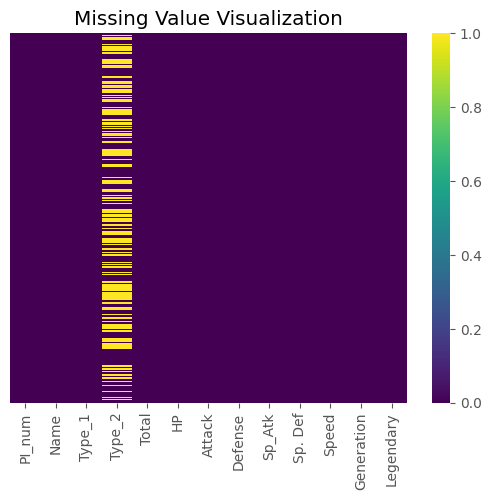

In [14]:
#Using heatmap to visualize missing values
ax = sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=True,
            cmap='viridis')
ax.set_title("Missing Value Visualization")
plt.show()

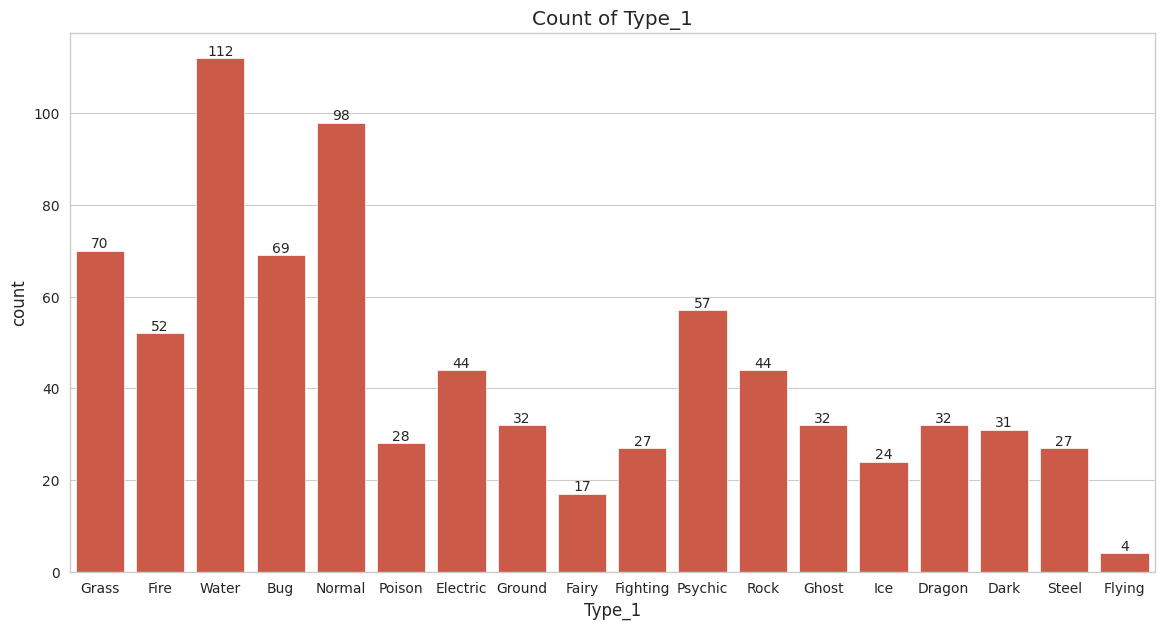

In [67]:
plt.figure(figsize=(14,7))
ax = sns.countplot(df, x='Type_1')
ax.set_title("Count of Type_1")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

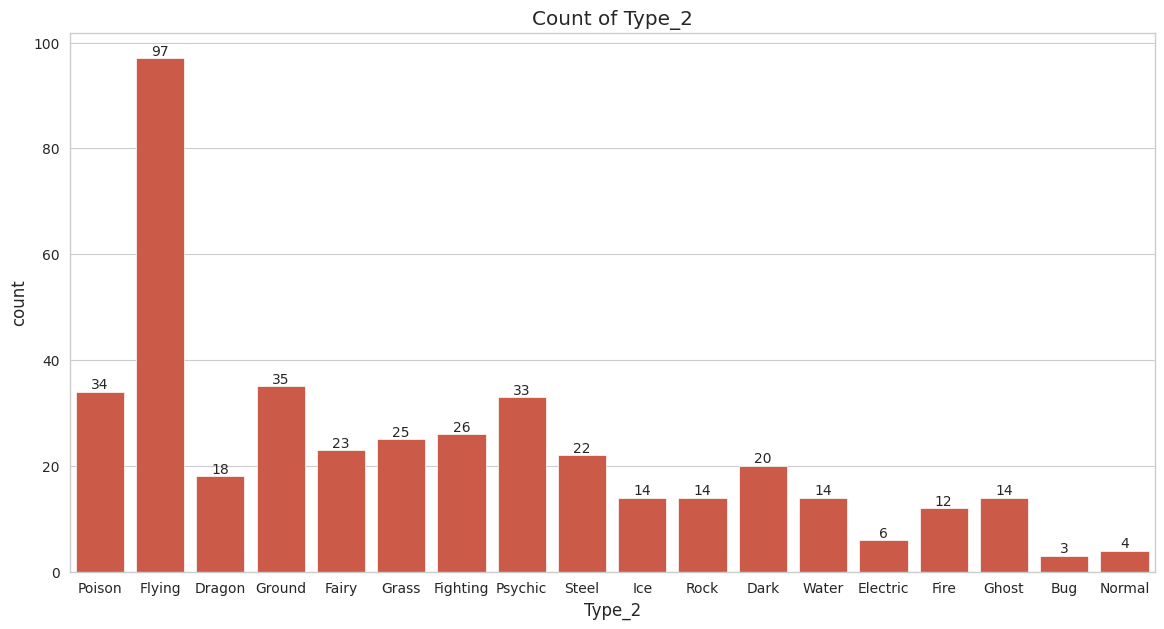

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
ax = sns.countplot(df, x='Type_2', h)
ax.set_title("Count of Type_2")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: Total, dtype: float64


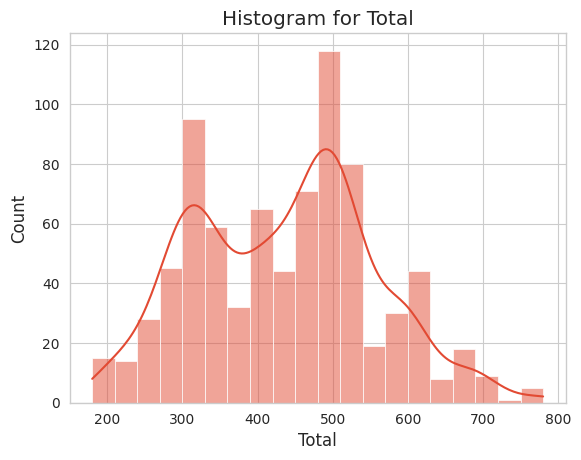

In [ ]:
print(df['Total'].describe())
ax = sns.histplot(df['Total'],bins= 20, kde='True')
ax.set_title('Histogram for Total')
plt.show()

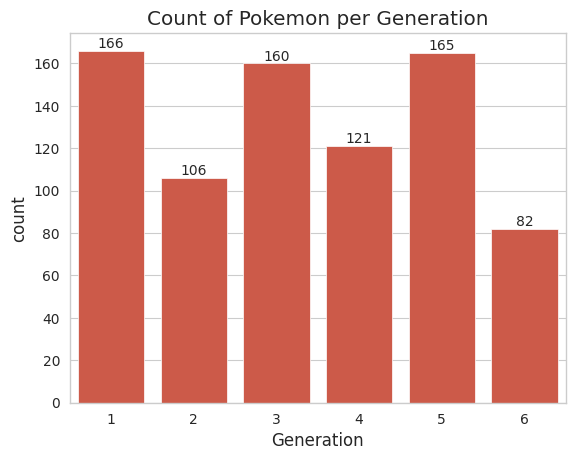

In [60]:
#Number of pokemon per genereation
ax = sns.countplot(df, x='Generation')
ax.set_title("Count of Pokemon per Generation")
for i in ax.containers:
    ax.bar_label(i)

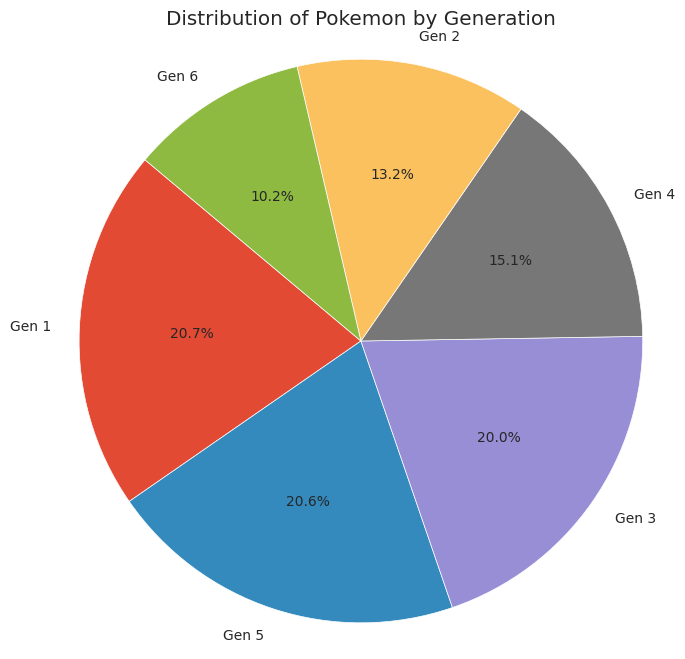

In [80]:
G_count = df['Generation'].value_counts()
generation_labels = {1: 'Gen 1', 2: 'Gen 2', 3: 'Gen 3', 4: 'Gen 4'
                     , 5: 'Gen 5', 6: 'Gen 6'}
labels_for_plot = [generation_labels[gen] for gen in G_count.index]
plt.figure(figsize=(8, 8))
plt.pie(G_count, labels=labels_for_plot, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pokemon by Generation')
plt.axis('equal')
plt.show()

In [108]:
df.loc[df["Total"].idxmax()]

PI_num                        150
Name          MewtwoMega Mewtwo X
Type_1                    Psychic
Type_2                   Fighting
Total                         780
HP                            106
Attack                        190
Defense                       100
Sp_Atk                        154
Sp. Def                       100
Speed                         130
Generation                      1
Legendary                    True
Name: 163, dtype: object

In [ ]:
df.loc[df["Total"].idxmin()]

PI_num            191
Name          Sunkern
Type_1          Grass
Type_2            NaN
Total             180
HP                 30
Attack             30
Defense            30
Sp_Atk             30
Sp. Def            30
Speed              30
Generation          2
Legendary       False
Name: 206, dtype: object

In [110]:
df.columns

Index(['PI_num', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [127]:
df_cor = df[['Total', 'HP', 'Attack','Defense', 'Sp_Atk', 
            'Sp_Def', 'Speed', 'Legendary']].corr()
df_cor

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp_Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp_Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


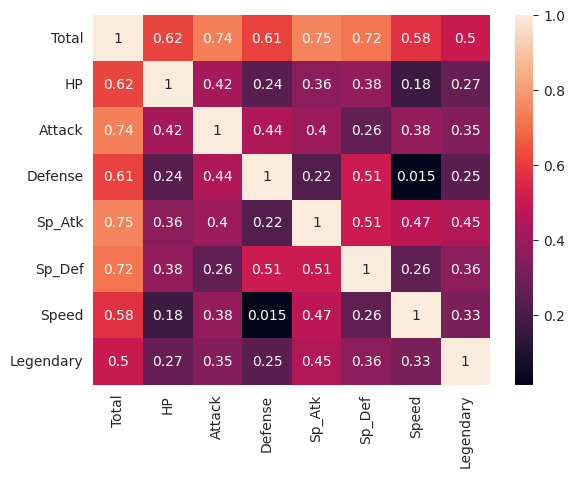

In [128]:
sns.heatmap(df_cor, annot=True)
plt.show()

In [129]:
#Adding missing values in Type 2
df['Type_2'] = df['Type_2'].fillna("No_Type_2")

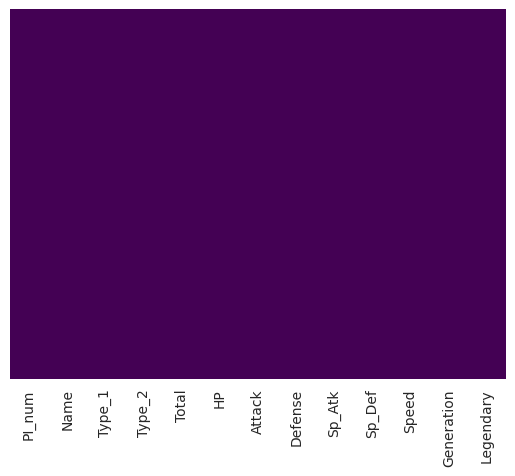

In [130]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [142]:
#Breaking data by generation 
df_G1 = df.loc[df['Generation']==1]
df_G2 = df.loc[df['Generation']==2]
df_G3 = df.loc[df['Generation']==3]
df_G4 = df.loc[df['Generation']==4]
df_G5 = df.loc[df['Generation']==5]
df_G6 = df.loc[df['Generation']==6]

In [145]:
df.loc[df_G2['Total'].idxmax()]

PI_num                            248
Name          TyranitarMega Tyranitar
Type_1                           Rock
Type_2                           Dark
Total                             700
HP                                100
Attack                            164
Defense                           150
Sp_Atk                             95
Sp_Def                            120
Speed                              71
Generation                          2
Legendary                       False
Name: 268, dtype: object